<a href="https://colab.research.google.com/github/shubhsingh827/YouTube-Transcript-Summarizer/blob/main/youtubetranscript1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 93.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.5 MB/s eta 0:00:00


In [ ]:
!pip install -q youtube_transcript_api

In [ ]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

In [ ]:
youtube_video = "https://www.youtube.com/watch?v=dlCl8jKgEHM"

In [ ]:
video_id = youtube_video.split("=")[1]

In [ ]:
video_id

'dlCl8jKgEHM'

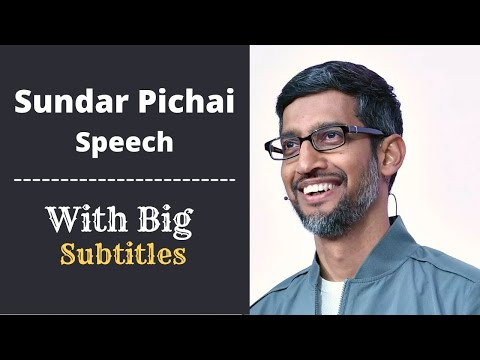

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [ ]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)

In [ ]:
transcript[0:5]

[{'text': '[Applause]', 'start': 2.74, 'duration': 5.74},
 {'text': 'thank you', 'start': 7.279, 'duration': 3.201},
 {'text': 'thank you to the president for convening',
  'start': 8.48,
  'duration': 4.159},
 {'text': 'the global entrepreneurship summit',
  'start': 10.48,
  'duration': 5.359},
 {'text': 'and to stanford for hosting we at google',
  'start': 12.639,
  'duration': 3.601}]

In [ ]:
result = ""
for i in transcript:
    result += ' ' + i[ 'text' ]
print(len(result))

4191


In [ ]:
summarizer = pipeline( 'summarization' )

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
   start = 0
   start = i * 1000
   end = (i + 1) * 1000
   out = summarizer(result[start:end],max_length = 100)
   out = out[0]
   out = out[ 'summary_text' ]
   summarized_text.append(out)

   print(summarized_text)

[" Google is proud to be supporting this summit and we are passionate about entrepreneurship this is such an important issue for our company but also for our country and for a community of entrepreneurs around the world at google entrepreneurship is in our dna . The company's first home was in a garage just a couple miles from here like many of you in the audience ."]
[" Google is proud to be supporting this summit and we are passionate about entrepreneurship this is such an important issue for our company but also for our country and for a community of entrepreneurs around the world at google entrepreneurship is in our dna . The company's first home was in a garage just a couple miles from here like many of you in the audience .", " cardboard our virtual reality viewer two engineers in our paris office had an idea of what's possible with a piece of cardboard and a phone . More than five million viewers are taking people to new worlds using cardboard teachers can take their classes on 

Your max_length is set to 100, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[" Google is proud to be supporting this summit and we are passionate about entrepreneurship this is such an important issue for our company but also for our country and for a community of entrepreneurs around the world at google entrepreneurship is in our dna . The company's first home was in a garage just a couple miles from here like many of you in the audience .", " cardboard our virtual reality viewer two engineers in our paris office had an idea of what's possible with a piece of cardboard and a phone . More than five million viewers are taking people to new worlds using cardboard teachers can take their classes on virtual field trips from the great barrier reef to machu picchu .", ' People born anywhere in the world can create a product and make it available to anyone . The most used messaging app in southeast asia was built by a young man born in ukraine who moved to the us . The three most popular viral games in the us in recent years came from entrepreneurs in finland ireland